In [ ]:
!pip install seaborn
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from imblearn.over_sampling import SMOTE

2024-04-17 17:53:41.319359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('forestfires.csv')
print(df.head())
print(df.describe())
print(df.dtypes)

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%    

<Axes: >

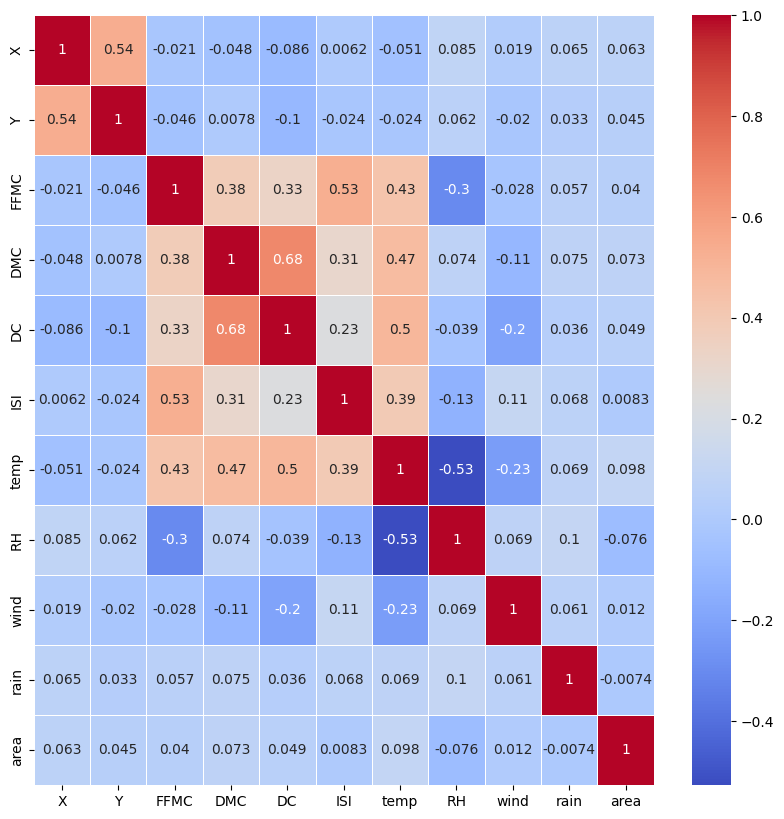

In [206]:
dfcor = df.drop(columns=['day', 'month'])
plt.figure(figsize=(10, 10))
sns.heatmap(dfcor.corr(), annot=True, cmap='coolwarm', linewidths=.5)

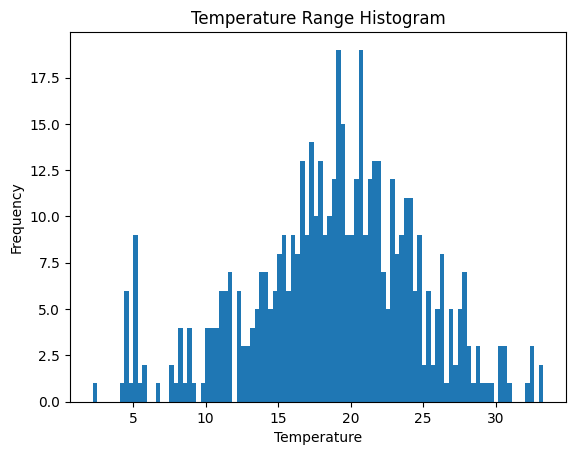

In [207]:
#ax = sns.countplot(x="temp",data=df)
plt.hist(df['temp'], bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Range Histogram')
plt.show()


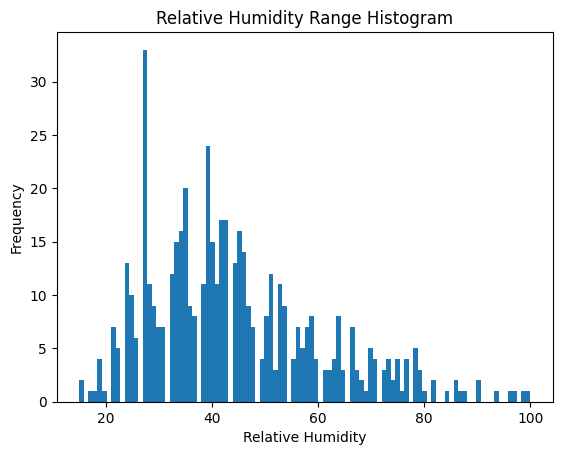

In [208]:
plt.hist(df['RH'], bins=100)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Relative Humidity Range Histogram')
plt.show()

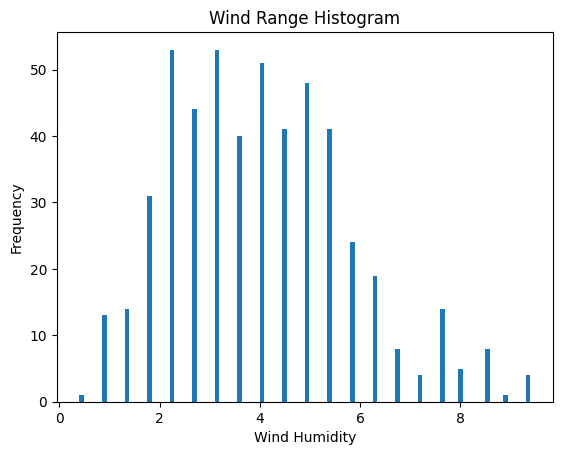

In [209]:
plt.hist(df['wind'], bins=100)
plt.xlabel('Wind Humidity')
plt.ylabel('Frequency')
plt.title('Wind Range Histogram')
plt.show()

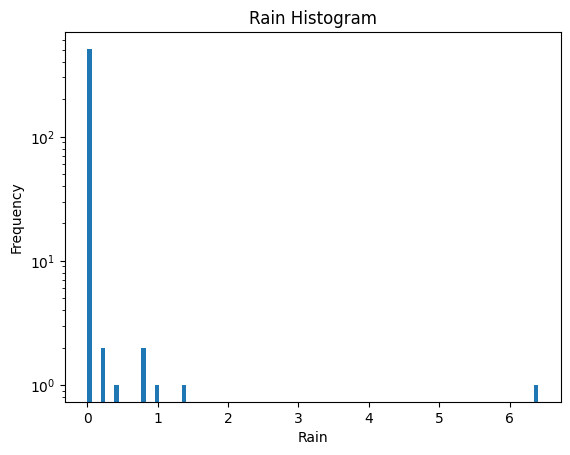

In [210]:
plt.hist(df['rain'], bins=100)
plt.yscale('log')
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.title('Rain Histogram')
plt.show()

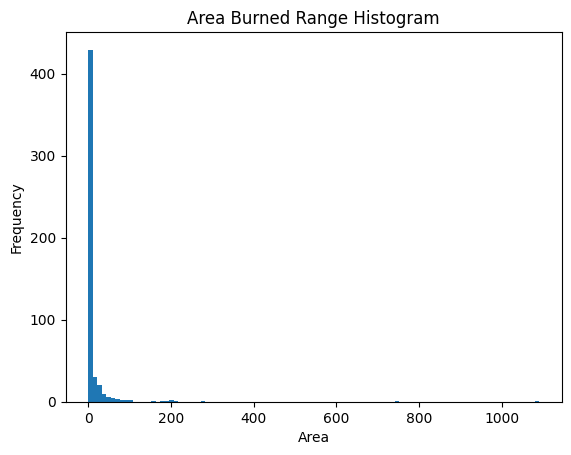

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64
[   0.      0.09    0.17    0.21    0.24    0.33    0.36    0.41    0.43
    0.47    0.52    0.54    0.55    0.61    0.68    0.71    0.72    0.75
    0.76    0.77    0.79    0.9     0.95    0.96    1.01    1.07    1.09
    1.1     1.12    1.19    1.23    1.26    1.29    1.36    1.38    1.43
    1.46    1.47    1.52    1.56    1.58    1.61    1.63    1.64    1.69
    1.72    1.75    1.76    1.9     1.94    1.95    2.      2.01    2.03
    2.07    2.13    2.14    2.17    2.18    2.21    2.29    2.35    2.44
    2.47    2.51    2.53    2.55    2.57    2.64    2.69    2.74    2.75
    2.77    2.87    2.93    3.05    3.07    3.09    3.18    3.19    3.2
    3.3     3.32    3.33    3.35    3.5     3.52    3.63    3.64    3.71
    3.78    3.93    3.94    3.95    4.25    4.4     4.41    4.42    4.53
   

In [211]:
plt.hist(df['area'], bins=100)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area Burned Range Histogram')
plt.show()
print(df['area'].describe())
print(np.sort(df['area'].unique()))

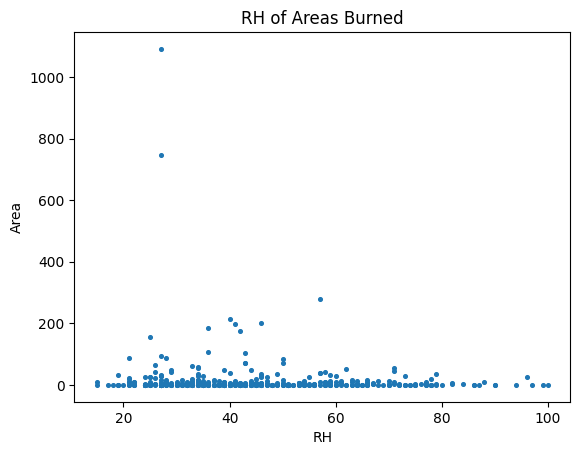

In [212]:
plt.scatter(df['RH'],df['area'], s=7)
plt.xlabel('RH')
plt.ylabel('Area')
plt.title('RH of Areas Burned')
plt.show()

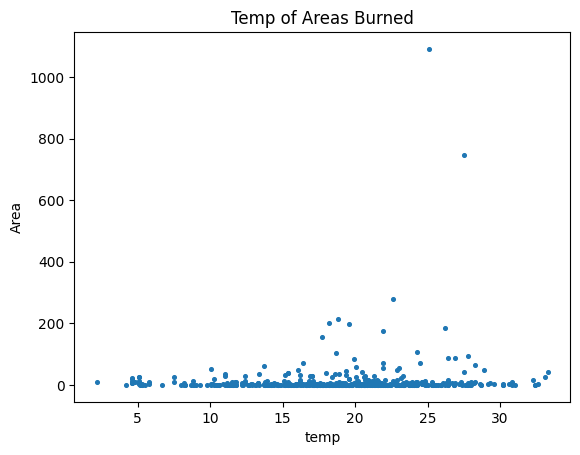

In [213]:
plt.scatter(df['temp'],df['area'], s=7)
plt.xlabel('temp')
plt.ylabel('Area')
plt.title('Temp of Areas Burned')
plt.show()

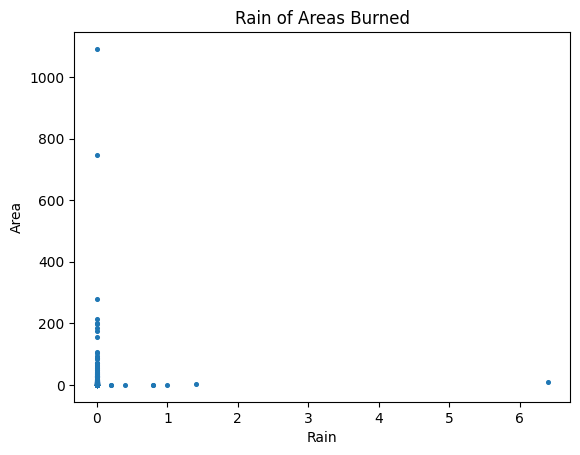

In [214]:
plt.scatter(df['rain'],df['area'], s=7)
plt.xlabel('Rain')
plt.ylabel('Area')
plt.title('Rain of Areas Burned')
plt.show()

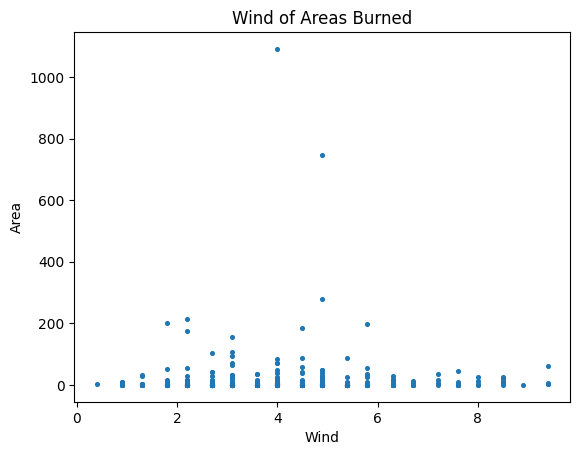

In [215]:
plt.scatter(df['wind'],df['area'], s=7)
plt.xlabel('Wind')
plt.ylabel('Area')
plt.title('Wind of Areas Burned')
plt.show()

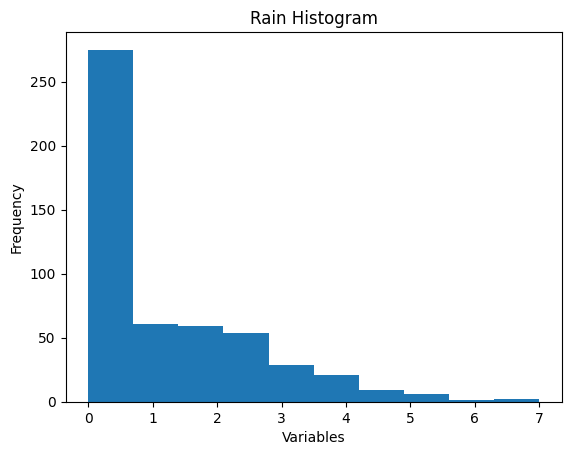

In [3]:
y = df['area'].to_numpy().astype(np.float32)
y = np.log1p(y)
#print(y)
#y = []
#for i in lab:
    #if i > 100 :
    #    y.append(4)
#    if i > 50:
#        y.append(3)
#    elif i > 10:
#        y.append(2)
#    elif i > 1:
#        y.append(1)
#    else:
#        y.append(0)
#y = np.array(y)
#print(y)
plt.hist(y)
#plt.yscale('log')
plt.xlabel('Variables')
plt.ylabel('Frequency')
plt.title('Rain Histogram')
plt.show()

In [217]:
unique, counts = np.unique(y, return_counts=True)
print(counts)
w_0, w_1, w_2, w_3 = counts/counts[0]
print(w_0, w_1, w_2, w_3)

[274 148  71  24]
1.0 0.5401459854014599 0.2591240875912409 0.08759124087591241


In [4]:
import pandas as pd

# One-hot encode the "month" column
df_encoded = pd.get_dummies(df, columns=['month'])


# Define the correct order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Rearrange the month columns in df_encoded
df_encoded = df_encoded[['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'] + ['month_' + month for month in month_order]]

df_encoded['month_jan'] = df_encoded['month_jan'].astype(int)
df_encoded['month_feb'] = df_encoded['month_feb'].astype(int)
df_encoded['month_mar'] = df_encoded['month_mar'].astype(int)
df_encoded['month_apr'] = df_encoded['month_apr'].astype(int)
df_encoded['month_may'] = df_encoded['month_may'].astype(int)
df_encoded['month_jun'] = df_encoded['month_jun'].astype(int)
df_encoded['month_jul'] = df_encoded['month_jul'].astype(int)
df_encoded['month_aug'] = df_encoded['month_aug'].astype(int)
df_encoded['month_sep'] = df_encoded['month_sep'].astype(int)
df_encoded['month_oct'] = df_encoded['month_oct'].astype(int)
df_encoded['month_nov'] = df_encoded['month_nov'].astype(int)
df_encoded['month_dec'] = df_encoded['month_dec'].astype(int)

# Print the encoded DataFrame
print(df_encoded)



     X  Y  day  FFMC    DMC     DC   ISI  temp  RH  wind  ...  month_mar  \
0    7  5  fri  86.2   26.2   94.3   5.1   8.2  51   6.7  ...          1   
1    7  4  tue  90.6   35.4  669.1   6.7  18.0  33   0.9  ...          0   
2    7  4  sat  90.6   43.7  686.9   6.7  14.6  33   1.3  ...          0   
3    8  6  fri  91.7   33.3   77.5   9.0   8.3  97   4.0  ...          1   
4    8  6  sun  89.3   51.3  102.2   9.6  11.4  99   1.8  ...          1   
..  .. ..  ...   ...    ...    ...   ...   ...  ..   ...  ...        ...   
512  4  3  sun  81.6   56.7  665.6   1.9  27.8  32   2.7  ...          0   
513  2  4  sun  81.6   56.7  665.6   1.9  21.9  71   5.8  ...          0   
514  7  4  sun  81.6   56.7  665.6   1.9  21.2  70   6.7  ...          0   
515  1  4  sat  94.4  146.0  614.7  11.3  25.6  42   4.0  ...          0   
516  6  3  tue  79.5    3.0  106.7   1.1  11.8  31   4.5  ...          0   

     month_apr  month_may  month_jun  month_jul  month_aug  month_sep  \
0            0

<Axes: >

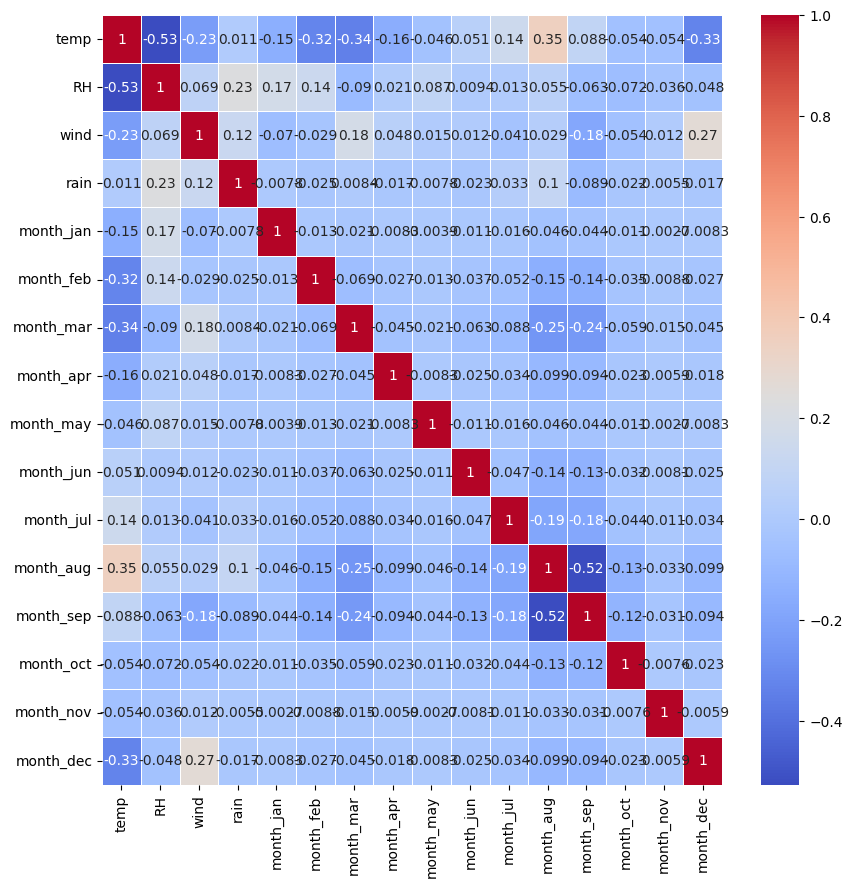

In [5]:
df2 = df_encoded.drop(columns=['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area'])
df2['rain'] = df2['rain'].apply(lambda x: int(x > 0.0))
#month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
#df2['month'] = df2['month'].map(month_mapping)
X = df2.to_numpy()
df2.head()
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=.5)


In [220]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)

In [221]:
unique, counts = np.unique(y_smt, return_counts=True)
print(counts)
w_0, w_1, w_2, w_3 = counts/counts[0]
print(w_0, w_1, w_2, w_3)

[274 274 274 274]
1.0 1.0 1.0 1.0


In [6]:
#stdsc = StandardScaler()
#stdsc.fit(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, y_train, X_test, y_test = X, y, X, y

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )
print(X_train[0])
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(517, 16) (517, 16) (517,) (517,)
[ 8.2 51.   6.7  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]
(array([0.        , 0.0861777 , 0.15700375, 0.19062035, 0.21511137,
       0.28517896, 0.30748472, 0.3435897 , 0.35767445, 0.3852624 ,
       0.41871032, 0.43178242, 0.43825495, 0.4762342 , 0.5187938 ,
       0.53649336, 0.5423243 , 0.5596158 , 0.5653138 , 0.57097954,
       0.5822156 , 0.64185387, 0.6678294 , 0.6729445 , 0.6981347 ,
       0.72754866, 0.7371641 , 0.74193734, 0.7514161 , 0.7839016 ,
       0.8020016 , 0.81536484, 0.8285518 , 0.85866165, 0.8671005 ,
       0.88789123, 0.9001614 , 0.90421814, 0.9242589 , 0.9400072 ,
       0.94778943, 0.9593502 , 0.96698385, 0.9707789 , 0.98954123,
       1.0006319 , 1.011601  , 1.0152307 , 1.0647107 , 1.0784096 ,
       1.0818052 , 1.0986123 , 1.10194   , 1.1085626 , 1.1216775 ,
       1.141033  , 1.1442229 , 1.1537316 , 1.1568812 , 1.166271  ,
       1.1908876 , 1.2089603 , 1.2354715 , 1.2441546 , 1.2556161 ,
       1.261

In [224]:
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(64, activation = 'relu', input_dim=X_train.shape[1]),
#  tf.keras.layers.Dropout(0.1),
#  tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#  tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#  tf.keras.layers.Dropout(0.1),
#  tf.keras.layers.Dense(4, activation = "softmax")
#])

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_dim = 16, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 100)               1700      
                                                                 
 dense_151 (Dense)           (None, 150)               15150     
                                                                 
 dense_152 (Dense)           (None, 150)               22650     
                                                                 
 dense_153 (Dense)           (None, 150)               22650     
                                                                 
 dense_154 (Dense)           (None, 150)               22650     
                                                                 
 dropout_46 (Dropout)        (None, 150)               0         
                                                                 
 dense_155 (Dense)           (None, 100)             

In [225]:
model.compile(loss = "mse", optimizer = "SGD", metrics = ["accuracy"], weighted_metrics=["accuracy"])
m = model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 26ms/step - loss: 0.7834 - accuracy: 0.3099 - weighted_accuracy: 0.3099 - val_loss: 0.8698 - val_accuracy: 0.2596 - val_weighted_accuracy: 0.2596
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7652 - accuracy: 0.3099 - weighted_accuracy: 0.3099 - val_loss: 0.8647 - val_accuracy: 0.2596 - val_weighted_accuracy: 0.2596
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7702 - accuracy: 0.2978 - weighted_accuracy: 0.2978 - val_loss: 0.8605 - val_accuracy: 0.2596 - val_weighted_accuracy: 0.2596
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7591 - accuracy: 0.2930 - weighted_accuracy: 0.2930 - val_loss: 0.8561 - val_accuracy: 0.2596 - val_weighted_accuracy: 0.2596
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7461 - accuracy: 0.3051 - weighted_accuracy: 0.3051 - val_loss: 0.8575 - val_accuracy: 0.2596 - val_weighted_accuracy: 0

In [188]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpqhvgffae/assets


INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpqhvgffae/assets
2024-04-16 14:27:46.364105: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-16 14:27:46.364753: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-16 14:27:46.366653: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpqhvgffae
2024-04-16 14:27:46.370369: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-16 14:27:46.370393: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpqhvgffae
2024-04-16 14:27:46.385245: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-04-16 14:27:46.530656: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

4/4 [==============================] - 0s 1ms/step
0.5384615384615384


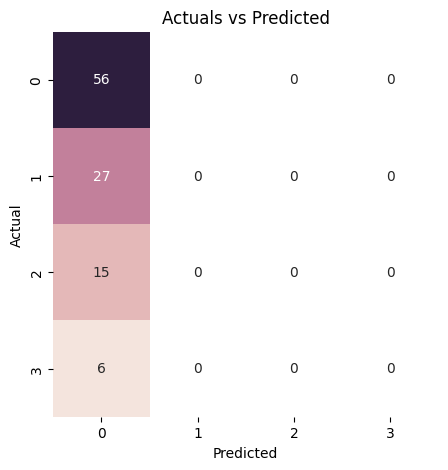

In [226]:
p = model.predict(X_test)
y = np.argmax(p, axis=1)
#print(y)
print(sk.metrics.accuracy_score(y_test, y))
data = sk.metrics.confusion_matrix(y_test, y)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})
plt.title('Actuals vs Predicted')
plt.show() 

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print("Mean Square Error:", sk.metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", sk.metrics.r2_score(y_test, y_pred))

Mean Square Error: 1.842857227091616
Root Mean Square Error: 1.3575187759628284
R2 Score: 0.05583613720590075


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 16, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

model.compile(loss = tf.keras.losses.mean_absolute_error, optimizer = tf.keras.optimizers.Adam(lr=0.01), metrics = ["mae"])
m = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, validation_data = (X_test, y_test))


Epoch 1/2000
17/17 [==============================] - 2s 22ms/step - loss: 1.1122 - mae: 1.1122 - val_loss: 1.1061 - val_mae: 1.1061
Epoch 2/2000
17/17 [==============================] - 0s 4ms/step - loss: 1.1057 - mae: 1.1057 - val_loss: 1.1032 - val_mae: 1.1032
Epoch 3/2000
17/17 [==============================] - 0s 4ms/step - loss: 1.1029 - mae: 1.1029 - val_loss: 1.1013 - val_mae: 1.1013
Epoch 4/2000
17/17 [==============================] - 0s 4ms/step - loss: 1.1044 - mae: 1.1044 - val_loss: 1.1004 - val_mae: 1.1004
Epoch 5/2000
17/17 [==============================] - 0s 4ms/step - loss: 1.1014 - mae: 1.1014 - val_loss: 1.1004 - val_mae: 1.1004
Epoch 6/2000
17/17 [==============================] - 0s 5ms/step - loss: 1.1009 - mae: 1.1009 - val_loss: 1.0975 - val_mae: 1.0975
Epoch 7/2000
17/17 [==============================] - 0s 6ms/step - loss: 1.0976 - mae: 1.0976 - val_loss: 1.0951 - val_mae: 1.0951
Epoch 8/2000
17/17 [==============================] - 0s 7ms/step - loss: 1

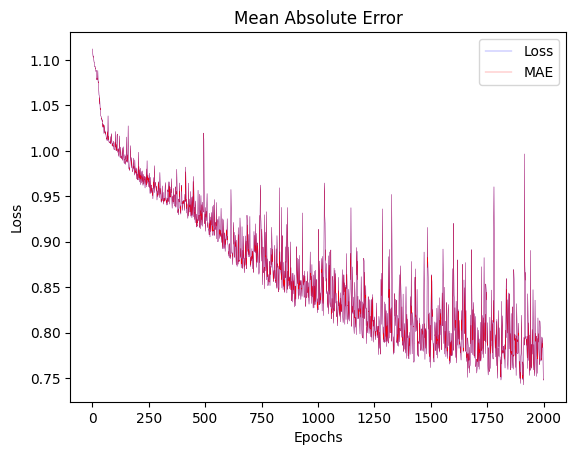

In [81]:
import matplotlib.pyplot as plt

# Get the loss and MAE from the history variable
loss = m.history['loss']
mae = m.history['mae']

# Create a range of epochs
epochs = range(1, len(loss) + 1)

# Plot the loss
plt.plot(epochs, loss, 'b', label='Loss',linewidth=0.2)
# Plot the MAE
plt.plot(epochs, mae, 'r', label='MAE',linewidth=0.2)
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [82]:
y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)
print(y_pred.shape, y_test.shape)

print("Mean Square Error:", sk.metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", sk.metrics.r2_score(y_test, y_pred))

17/17 [==============================] - 0s 1ms/step
(517,) (517,)
Mean Square Error: 1.6063821
R2 Score: 0.17699106567460177


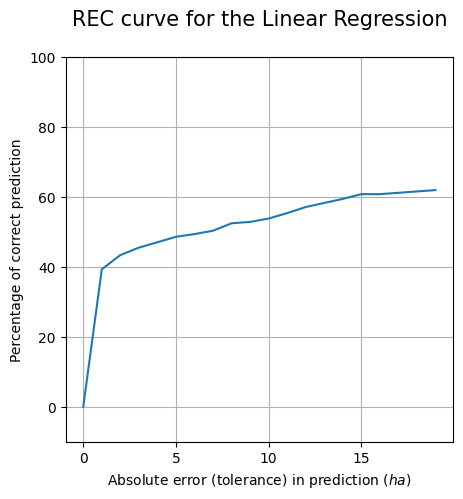

In [83]:
# Defining REC (regression error charcteristics)
def rec(m, n, tol):     
    if type(m) != 'numpy.ndarray':
        m = np.array(m)
    if type(n) != 'numpy.ndarray':
        n = np.array(n)

    l = m.size       #Assigning m.size to l
    percent = 0
    for i in range(l):
        if np.abs(10 ** m[i] - 10 ** n[i]) <= tol:
            percent += 1
    return 100 * (percent / l) 

rec_lm=[]
for i in range(20):
    rec_lm.append(rec(y_pred, y_test, i))

plt.figure(figsize=(5 ,5))   
plt.title("REC curve for the Linear Regression\n",fontsize = 15)  
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   
plt.ylabel("Percentage of correct prediction")   
plt.xticks([i for i in range(0, 20 + 1, 5)])
plt.ylim(-10, 100)    
plt.yticks([i * 20 for i in range(6)])
plt.grid(True)   
plt.plot(range(20), rec_lm)

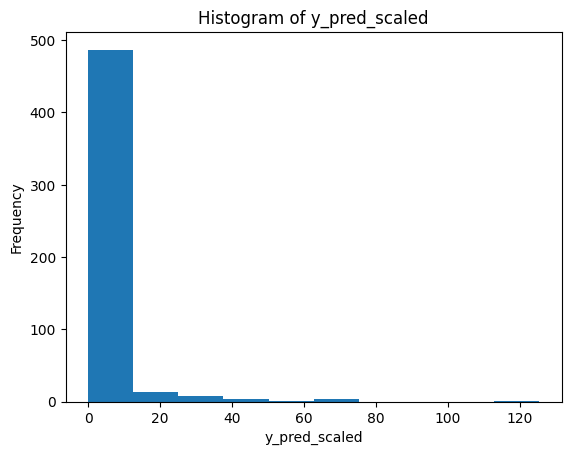

In [84]:
y_pred_scaled = np.expm1(y_pred)
y_orig = np.expm1(y_test)


# Assuming y_pred_scaled is a numpy array
plt.hist(y_pred_scaled, bins=10)  # Adjust the number of bins as needed
plt.xlabel('y_pred_scaled')
plt.ylabel('Frequency')
plt.title('Histogram of y_pred_scaled')
plt.show()


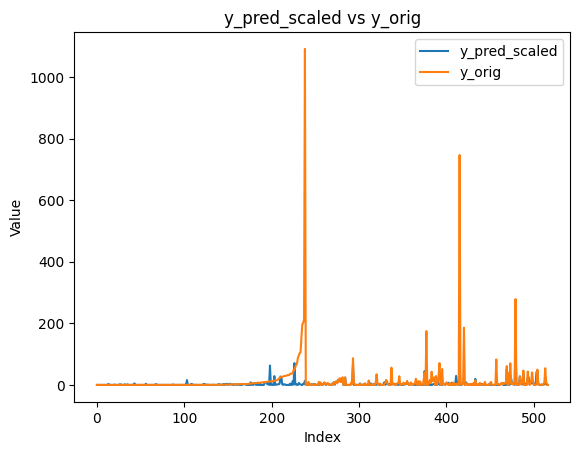

In [85]:

y_diff = y_orig - y_pred_scaled
# Assuming y_pred_scaled and y_orig are numpy arrays
plt.plot(y_pred_scaled, label='y_pred_scaled')
plt.plot(y_orig, label='y_orig')
#plt.plot(y_diff, label='y_diff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('y_pred_scaled vs y_orig')
plt.show()


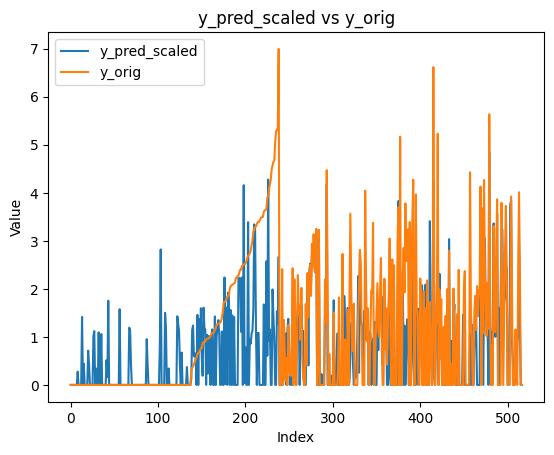

In [86]:
y_d = y_test - y_pred
plt.plot(y_pred, label='y_pred_scaled')
plt.plot(y_test, label='y_orig')
#plt.plot(y_d, label='y_diff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('y_pred_scaled vs y_orig')
plt.show()

In [87]:
data = []
for i in range(len(y_test)):
    data.append([y_orig[i], y_pred_scaled[i], y_diff[i]])

valDf = pd.DataFrame(data, columns = ['y_orig', 'y_pred_scaled', 'y_diff'])
for i in range(len(y_test)):
    print(valDf.iloc[i])
    print("---  --- ---")

y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 0, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 1, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 2, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 3, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 4, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 5, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 6, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.000394
y_diff          -0.000394
Name: 7, dtype: float32
---  --- ---
y_orig           0.000000
y_pred_scaled    0.318264
y_diff          -0.318264
Na

In [88]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('lr_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmp1h7_8f9x/assets


INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmp1h7_8f9x/assets
2024-04-17 18:19:03.111156: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-17 18:19:03.111172: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-17 18:19:03.111705: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmp1h7_8f9x
2024-04-17 18:19:03.114412: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-17 18:19:03.114428: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmp1h7_8f9x
2024-04-17 18:19:03.119896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-04-17 18:19:03.122519: I tensorflow/cc/saved_model/load